  antecedents consequents  antecedent support  consequent support   support  \
1    (butter)     (bread)            0.333333            0.833333  0.333333   

   confidence  lift  representativity  leverage  conviction  zhangs_metric  \
1         1.0   1.2               1.0  0.055556         inf           0.25   

   jaccard  certainty  kulczynski  
1      0.4        1.0         0.7  


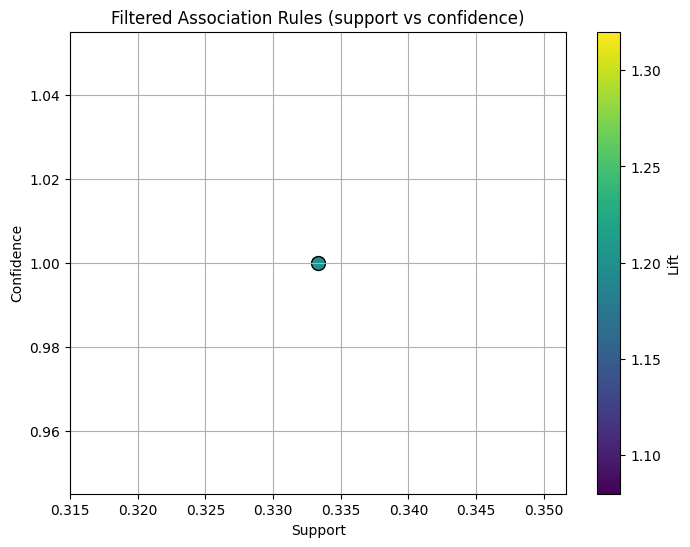

In [1]:
# Question 10: Market Basket Analysis using Apriori Algorithm
# Description: Perform market basket analysis on a dataset of transactions using the Apriori algorithm to find frequent itemsets and association rules.

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

dataset = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread'],
    ['milk', 'eggs'],
    ['bread', 'eggs'],
    ['milk', 'bread', 'eggs', 'butter'],
    ['bread', 'butter']
]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

filtered_rules = rules[(rules['confidence'] >= 0.7) & (rules['lift'] >= 1.2)]

print(filtered_rules)

plt.figure(figsize=(8, 6))
plt.scatter(filtered_rules['support'], filtered_rules['confidence'], 
            c=filtered_rules['lift'], cmap='viridis', s=100, edgecolor='k')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Filtered Association Rules (support vs confidence)')
plt.grid(True)
plt.show()


